<a href="https://colab.research.google.com/github/IhsanTafaquh-coder-dev/Kelompok-f/blob/main/C1_23_UL20123013_Ihsan_Tafaquh_Fiddin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving optics.csv to optics (8).csv
📊 OPTICS Evaluation (excluding noise):
   Silhouette Score:        0.6739
   Davies-Bouldin Index:    0.4449
   Calinski-Harabasz Index: 2511.27

⚠️ DBSCAN (eps=0.5): Not enough clusters for evaluation.

⚠️ DBSCAN (eps=2.0): Not enough clusters for evaluation.



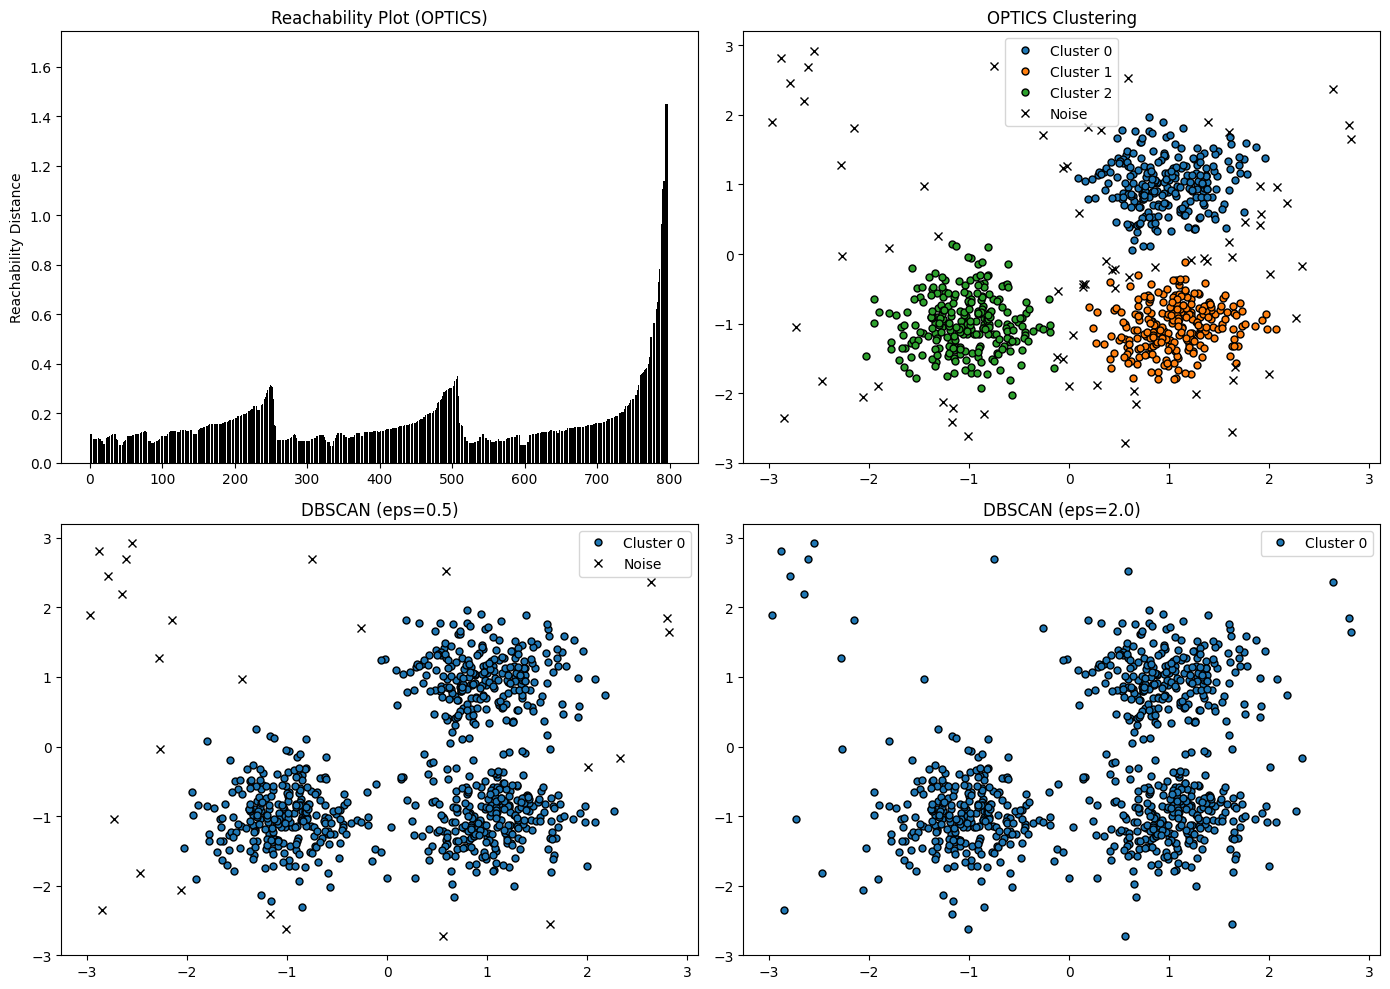

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

df = pd.read_csv("optics.csv")

# ----------------------------------------------------
# Generate sample data
# ----------------------------------------------------
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# Add uniform spatial noise
rng = np.random.RandomState(42)
noise = rng.uniform(low=-3, high=3, size=(50, 2))
X = np.vstack([X, noise])

# ----------------------------------------------------
# Run the fit (OPTICS)
# ----------------------------------------------------
optics_model = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1)
optics_model.fit(X)
labels_optics = optics_model.labels_

# Reachability
space = np.arange(len(X))
reachability = optics_model.reachability_[optics_model.ordering_]
labels_ordered = optics_model.labels_[optics_model.ordering_]

# ----------------------------------------------------
# DBSCAN at eps=0.5
# ----------------------------------------------------
dbscan_05 = DBSCAN(eps=0.5, min_samples=10)
labels_dbscan_05 = dbscan_05.fit_predict(X)

# ----------------------------------------------------
# DBSCAN at eps=2.0
# ----------------------------------------------------
dbscan_20 = DBSCAN(eps=2.0, min_samples=10)
labels_dbscan_20 = dbscan_20.fit_predict(X)

# ----------------------------------------------------
# Evaluation Metrics Function
# ----------------------------------------------------
def evaluate_clustering(X, labels, method):
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        sil = silhouette_score(X[mask], labels[mask])
        db = davies_bouldin_score(X[mask], labels[mask])
        ch = calinski_harabasz_score(X[mask], labels[mask])
        print(f"📊 {method} Evaluation (excluding noise):")
        print(f"   Silhouette Score:        {sil:.4f}")
        print(f"   Davies-Bouldin Index:    {db:.4f}")
        print(f"   Calinski-Harabasz Index: {ch:.2f}\n")
    else:
        print(f"⚠️ {method}: Not enough clusters for evaluation.\n")

# Evaluate all
evaluate_clustering(X, labels_optics, "OPTICS")
evaluate_clustering(X, labels_dbscan_05, "DBSCAN (eps=0.5)")
evaluate_clustering(X, labels_dbscan_20, "DBSCAN (eps=2.0)")

# ----------------------------------------------------
# Reachability Plot & Cluster Results
# ----------------------------------------------------
plt.figure(figsize=(14, 10))

# Reachability
plt.subplot(2, 2, 1)
plt.bar(space, reachability, color='k')
plt.ylabel('Reachability Distance')
plt.title('Reachability Plot (OPTICS)')

# OPTICS Clustering
plt.subplot(2, 2, 2)
unique_labels = set(labels_optics)
colors = [plt.cm.tab10(i/10.) for i in range(len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_mask = (labels_optics == k)
    xy = X[class_mask]
    if k == -1:
        plt.plot(xy[:, 0], xy[:, 1], 'x', color='k', label='Noise')
    else:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5, label=f'Cluster {k}')
plt.title('OPTICS Clustering')
plt.legend()

# DBSCAN (eps=0.5)
plt.subplot(2, 2, 3)
unique_labels = set(labels_dbscan_05)
for k, col in zip(unique_labels, colors):
    class_mask = (labels_dbscan_05 == k)
    xy = X[class_mask]
    if k == -1:
        plt.plot(xy[:, 0], xy[:, 1], 'x', color='k', label='Noise')
    else:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5, label=f'Cluster {k}')
plt.title('DBSCAN (eps=0.5)')
plt.legend()

# DBSCAN (eps=2.0)
plt.subplot(2, 2, 4)
unique_labels = set(labels_dbscan_20)
for k, col in zip(unique_labels, colors):
    class_mask = (labels_dbscan_20 == k)
    xy = X[class_mask]
    if k == -1:
        plt.plot(xy[:, 0], xy[:, 1], 'x', color='k', label='Noise')
    else:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5, label=f'Cluster {k}')
plt.title('DBSCAN (eps=2.0)')
plt.legend()

plt.tight_layout()
plt.show()

# New Section